<a href="https://colab.research.google.com/github/MutukuMwende/Heart-failure-project/blob/main/Mini_heart_failure_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np #numerical
import pandas as pd #data manipulation
import os #file handling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix  # Evaluation metrics
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mini Heart failure project/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mini Heart failure project/test.csv')
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mini Heart failure project/sample.csv')

In [ ]:
print("train data info :")
train.info()
print("test data info:")
test.info()
print("sample submission info:")
sample.info()

train data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56000 non-null  int64  
 1   age          56000 non-null  int64  
 2   gender       56000 non-null  int64  
 3   height       56000 non-null  int64  
 4   weight       56000 non-null  float64
 5   ap_hi        56000 non-null  int64  
 6   ap_lo        56000 non-null  int64  
 7   cholesterol  56000 non-null  int64  
 8   gluc         56000 non-null  int64  
 9   smoke        56000 non-null  int64  
 10  alco         56000 non-null  int64  
 11  active       56000 non-null  int64  
 12  cardio       56000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.6 MB
test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------

In [ ]:
train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,83327,18995,2,162,83.0,120,80,1,1,0,0,0,1
1,86196,17319,1,158,64.0,120,80,1,1,0,0,1,0
2,59158,19017,1,165,95.0,160,100,2,1,0,0,1,1
3,16399,20388,1,164,83.0,150,100,1,1,0,0,1,1
4,29470,18236,1,156,52.0,100,67,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,43962,21085,1,165,53.0,120,75,1,1,0,0,1,1
55996,80040,21979,2,169,68.0,120,80,1,3,0,1,1,0
55997,69746,19930,2,170,74.0,120,80,1,1,0,0,0,1
55998,30472,20912,1,169,91.0,130,90,1,1,0,0,0,1


In [ ]:
test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,26681,19386,1,155,59.5,120,85,1,1,0,0,1
1,58585,21081,1,160,59.0,130,90,1,1,0,0,1
2,54339,15129,2,175,88.0,120,80,2,1,0,0,1
3,17273,18785,2,177,62.0,120,90,1,1,0,0,1
4,25420,18171,1,167,81.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13995,34457,21090,1,166,88.0,160,100,1,3,0,0,1
13996,40980,22442,2,176,105.0,140,90,1,1,0,0,1
13997,83726,21871,1,159,87.0,160,1100,1,1,0,0,1
13998,11086,18310,1,165,73.0,120,80,1,1,0,0,1


In [ ]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,83327,18995,2,162,83.0,120,80,1,1,0,0,0,1
1,86196,17319,1,158,64.0,120,80,1,1,0,0,1,0
2,59158,19017,1,165,95.0,160,100,2,1,0,0,1,1
3,16399,20388,1,164,83.0,150,100,1,1,0,0,1,1
4,29470,18236,1,156,52.0,100,67,1,1,0,0,0,0


In [ ]:
print(train.isnull().sum())  # Shows the count of missing values per column

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
print(train.info())  # Displays column data types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56000 non-null  int64  
 1   age          56000 non-null  int64  
 2   gender       56000 non-null  int64  
 3   height       56000 non-null  int64  
 4   weight       56000 non-null  float64
 5   ap_hi        56000 non-null  int64  
 6   ap_lo        56000 non-null  int64  
 7   cholesterol  56000 non-null  int64  
 8   gluc         56000 non-null  int64  
 9   smoke        56000 non-null  int64  
 10  alco         56000 non-null  int64  
 11  active       56000 non-null  int64  
 12  cardio       56000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.6 MB
None


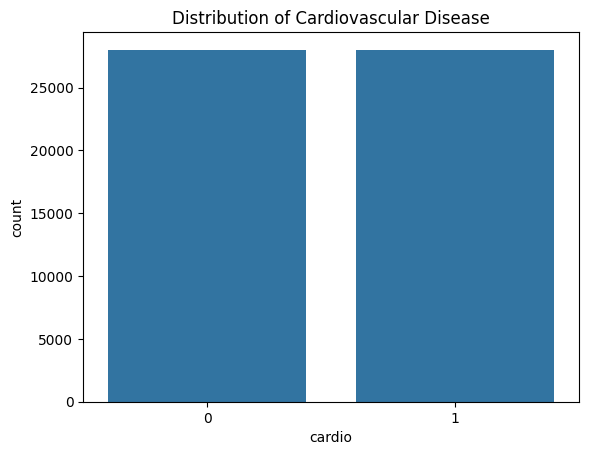

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train["cardio"])
plt.title("Distribution of Cardiovascular Disease")
plt.show()

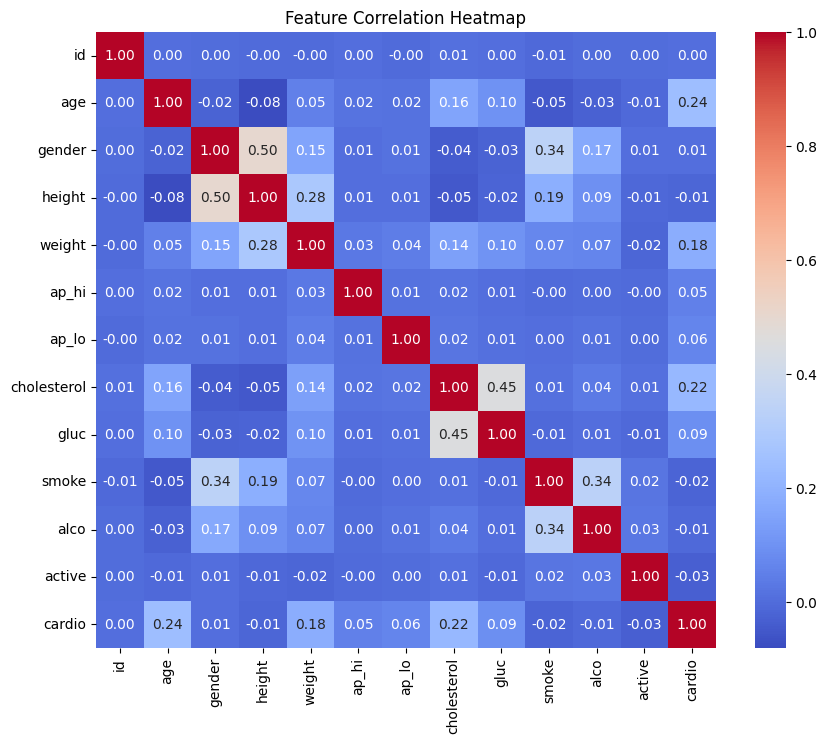

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
train.drop(columns=["id"], inplace=True)
train.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

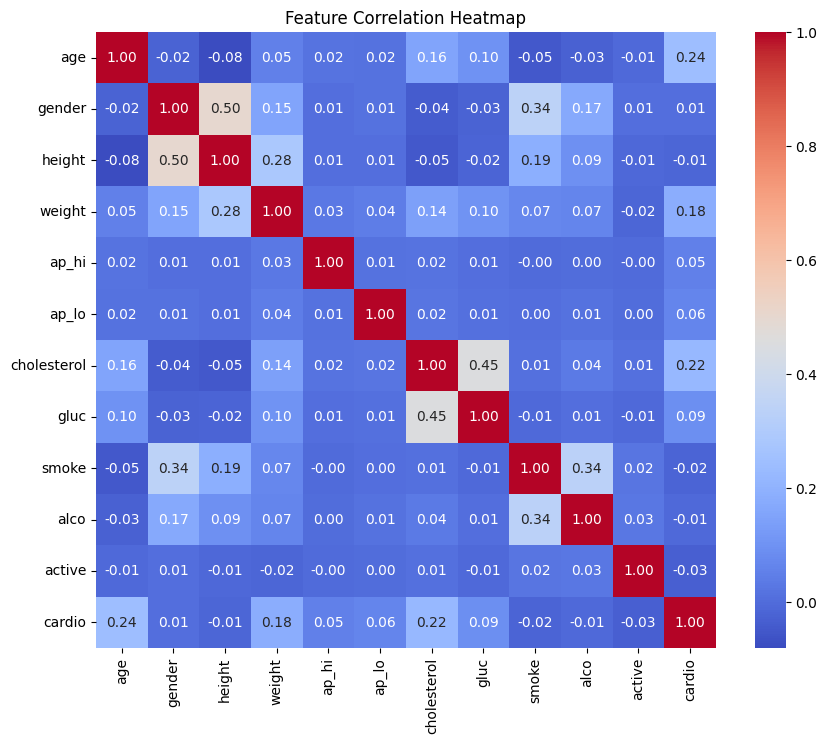

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
test.drop(columns=["id"], inplace=True)
test.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [ ]:
set(train.columns) - set(test.columns)  # Shows missing columns
{'cardio'}

{'cardio'}

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      21 non-null     int64
 1   cardio  21 non-null     int64
dtypes: int64(2)
memory usage: 468.0 bytes


In [ ]:
sample.drop(columns=['id'], inplace=True)
sample.head()

,cardio
0,0
1,0
2,0
3,0
4,0


In [ ]:
sample.shape

(21, 1)

In [ ]:
test.shape

(14000, 11)

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = train.drop(columns=["cardio"])  # Features (excluding target)
y = train["cardio"]                 # Target (cardiovascular disease: 0 or 1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train_scaled, y_train)  # Train the model

LogisticRegression()

In [ ]:
X_test_scaled = scaler.transform(X_val)

y_pred = LRmodel.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7104


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      5603
           1       0.73      0.67      0.70      5597

    accuracy                           0.71     11200
   macro avg       0.71      0.71      0.71     11200
weighted avg       0.71      0.71      0.71     11200



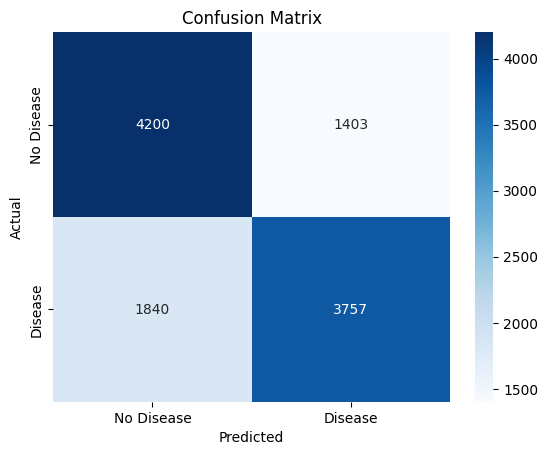

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTmodel = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = DTmodel.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7247


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      5603
           1       0.75      0.67      0.71      5597

    accuracy                           0.72     11200
   macro avg       0.73      0.72      0.72     11200
weighted avg       0.73      0.72      0.72     11200



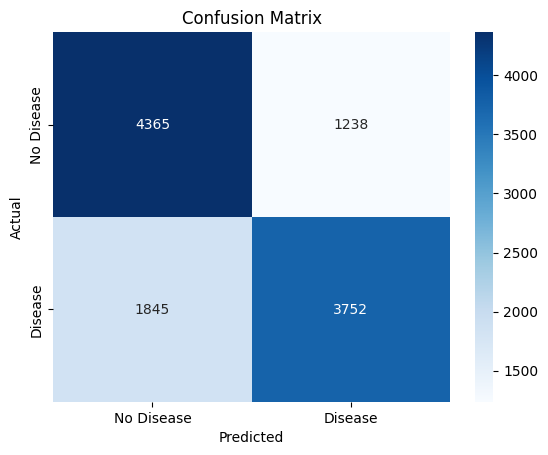

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

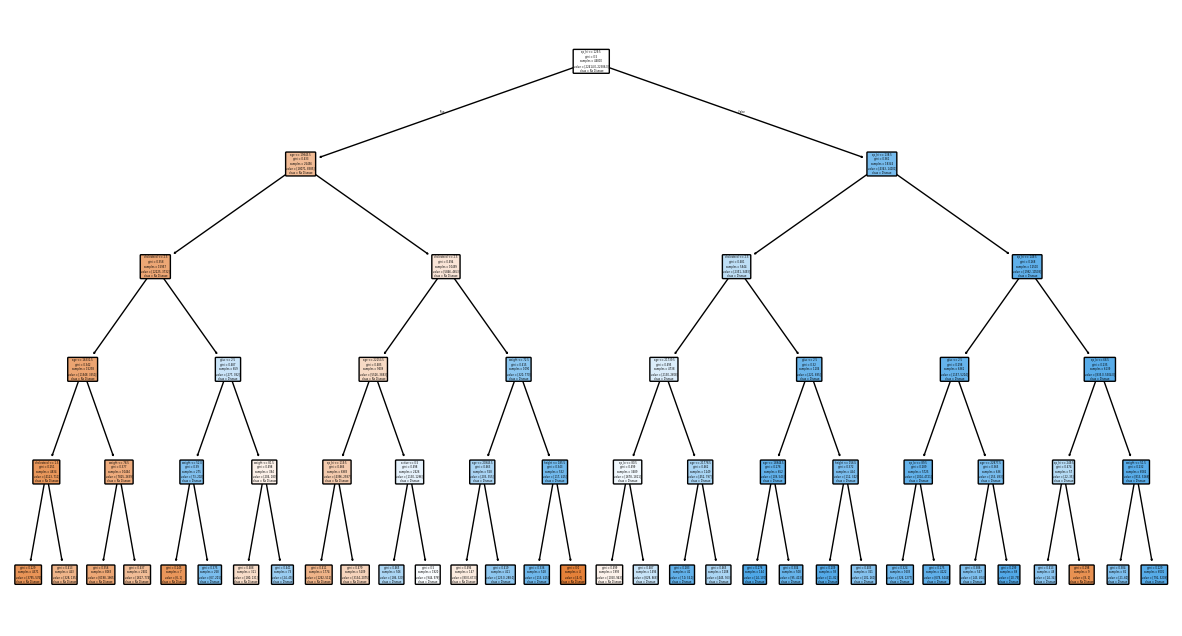

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(DTmodel, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
RFmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = RFmodel.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7334


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      5603
           1       0.76      0.68      0.72      5597

    accuracy                           0.73     11200
   macro avg       0.74      0.73      0.73     11200
weighted avg       0.74      0.73      0.73     11200



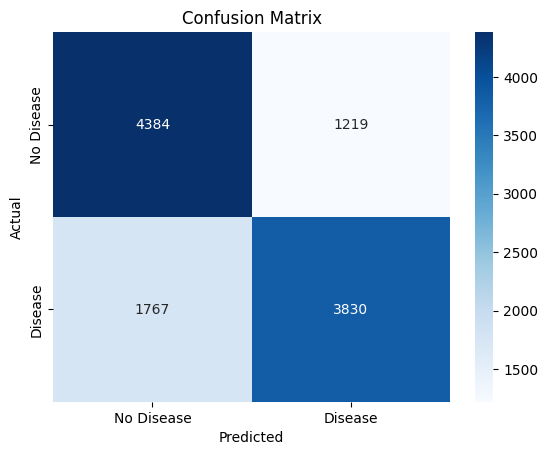

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Compare the models using a confusion matrix and classification report to determine the best-performing model.**¶**

In [ ]:
# Random Forest Predictions
y_pred_rf = RFmodel.predict(X_val)

# Decision Tree Predictions
y_pred_dt = DTmodel.predict(X_val)

# Logistic Regression Predictions
y_pred_lr = LRmodel.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

acc_rf = accuracy_score(y_val, y_pred_rf)
acc_dt = accuracy_score(y_val, y_pred_dt)
acc_lr = accuracy_score(y_val, y_pred_lr)

print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

Random Forest Accuracy: 0.7334
Decision Tree Accuracy: 0.7247
Logistic Regression Accuracy: 0.7104


In [ ]:
from sklearn.metrics import classification_report

print("🔷 Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

print("🔶 Decision Tree Classification Report:")
print(classification_report(y_val, y_pred_dt))

print("🔴 Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_lr))

🔷 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      5603
           1       0.76      0.68      0.72      5597

    accuracy                           0.73     11200
   macro avg       0.74      0.73      0.73     11200
weighted avg       0.74      0.73      0.73     11200

🔶 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      5603
           1       0.75      0.67      0.71      5597

    accuracy                           0.72     11200
   macro avg       0.73      0.72      0.72     11200
weighted avg       0.73      0.72      0.72     11200

🔴 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      5603
           1       0.73      0.67      0.70      5597

    accuracy                           0.71     11200
   ma

In [ ]:
# X_test
# y_test

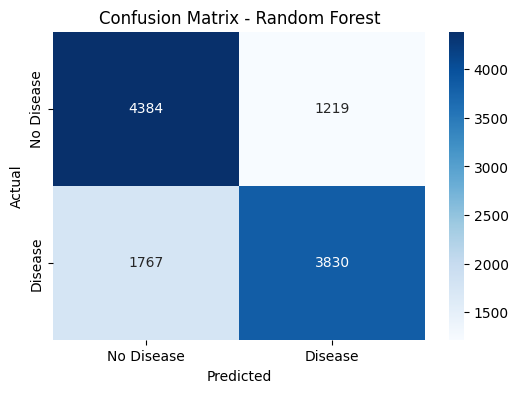

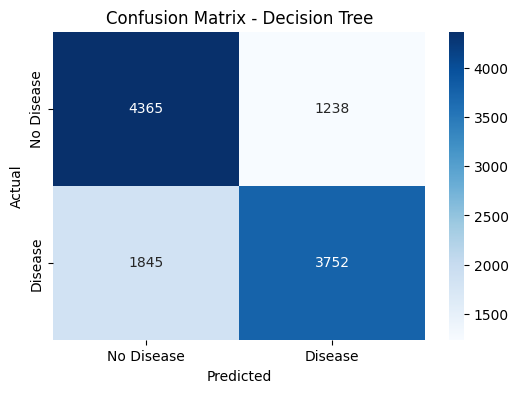

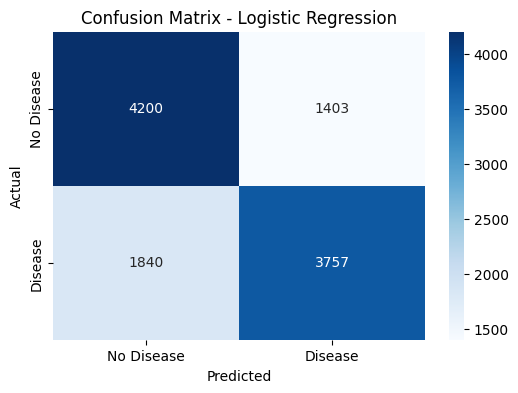

In [ ]:
# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot for each model
plot_confusion_matrix(y_val, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_val, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_val, y_pred_lr, "Logistic Regression")

# Hyperparameter Tuning for Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum samples per split
    'min_samples_leaf': [1, 2, 5],       # Minimum samples per leaf
    'criterion': ['gini', 'entropy']     # Splitting criterion
}

# Grid Search
grid_search_dt = GridSearchCV(DTmodel, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)# Best model
best_DTmodel = grid_search_dt.best_estimator_
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Evaluate tuned model
y_pred_dt_tuned = best_DTmodel.predict(X_val)
acc_dt_tuned = accuracy_score(y_val, y_pred_dt_tuned)
print(f"Tuned Decision Tree Accuracy: {acc_dt_tuned:.4f}")

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.7247


# Hyperparameter Tuning for Random Forest

In [ ]:
# Define hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [10, 20, 30, None],     # Maximum depth
    'min_samples_split': [2, 5, 10],     # Minimum samples per split
    'min_samples_leaf': [1, 2, 5],       # Minimum samples per leaf
    'bootstrap': [True, False]           # Use bootstrapping?
}

# Grid Search
grid_search_rf = GridSearchCV(RFmodel, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best model
best_RFmodel = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate tuned model
y_pred_rf_tuned = best_RFmodel.predict(X_val)
acc_rf_tuned = accuracy_score(y_val, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {acc_rf_tuned:.4f}")

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.7334


# Hyperparameter Tuning for Logistic Regression

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver method
    'penalty': ['l1', 'l2']  # Regularization type
}

# Grid Search
grid_search_lr = GridSearchCV(LRmodel, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best model
best_LRmodel = grid_search_lr.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

# Evaluate tuned model
y_pred_lr_tuned = best_LRmodel.predict(X_test_scaled)
acc_lr_tuned = accuracy_score(y_val, y_pred_lr_tuned)
print(f"Tuned Logistic Regression Accuracy: {acc_lr_tuned:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.5003


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


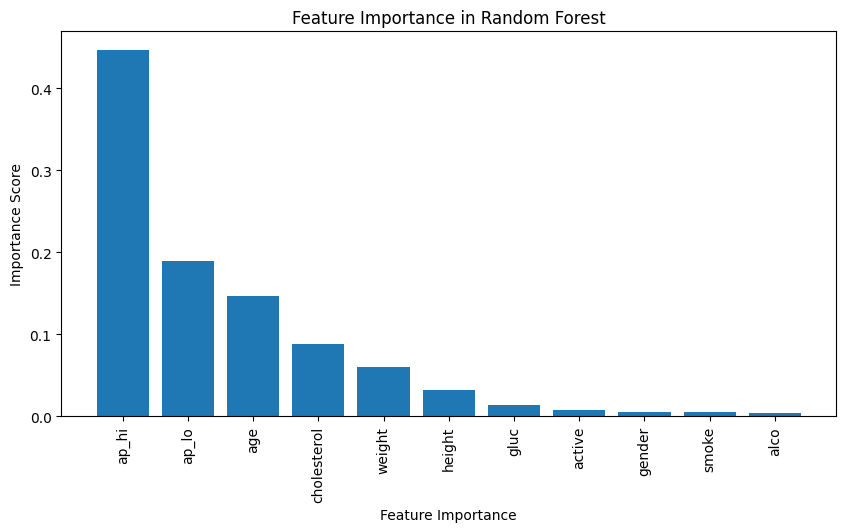

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = best_RFmodel.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), feature_importance[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      5603
           1       0.76      0.68      0.72      5597

    accuracy                           0.73     11200
   macro avg       0.74      0.73      0.73     11200
weighted avg       0.74      0.73      0.73     11200



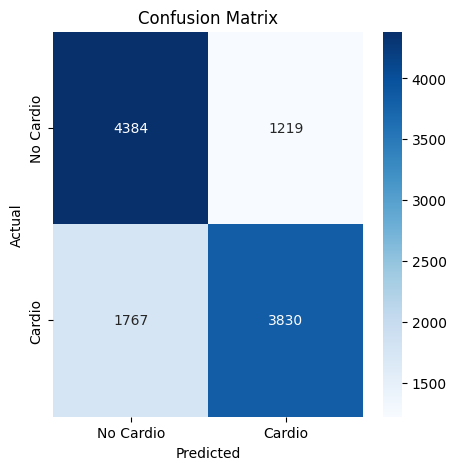

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_val, y_pred_rf_tuned))

cm = confusion_matrix(y_val, y_pred_rf_tuned)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cardio', 'Cardio'], yticklabels=['No Cardio', 'Cardio'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Submission Prediction

In [ ]:
test_pred = best_RFmodel.predict(test)

In [ ]:
# Create a submission
submission = pd.DataFrame({"id": test.index, "cardio": test_pred})

# Save to CSV
submission.to_csv("submission.csv", index=False)